In [1]:
import cv2

In [5]:
from img2table.document import Image
from PIL import Image as PILImage

img = Image(src="Image10.jpg")

# Extract tables
extracted_tables = img.extract_tables()
print(extracted_tables)
type(extracted_tables[1])

[ExtractedTable(title=None, bbox=(74, 506, 766, 778),shape=(5, 13)), ExtractedTable(title=None, bbox=(75, 123, 752, 386),shape=(7, 13)), ExtractedTable(title=None, bbox=(77, 907, 774, 1185),shape=(5, 13))]


img2table.tables.objects.extraction.ExtractedTable

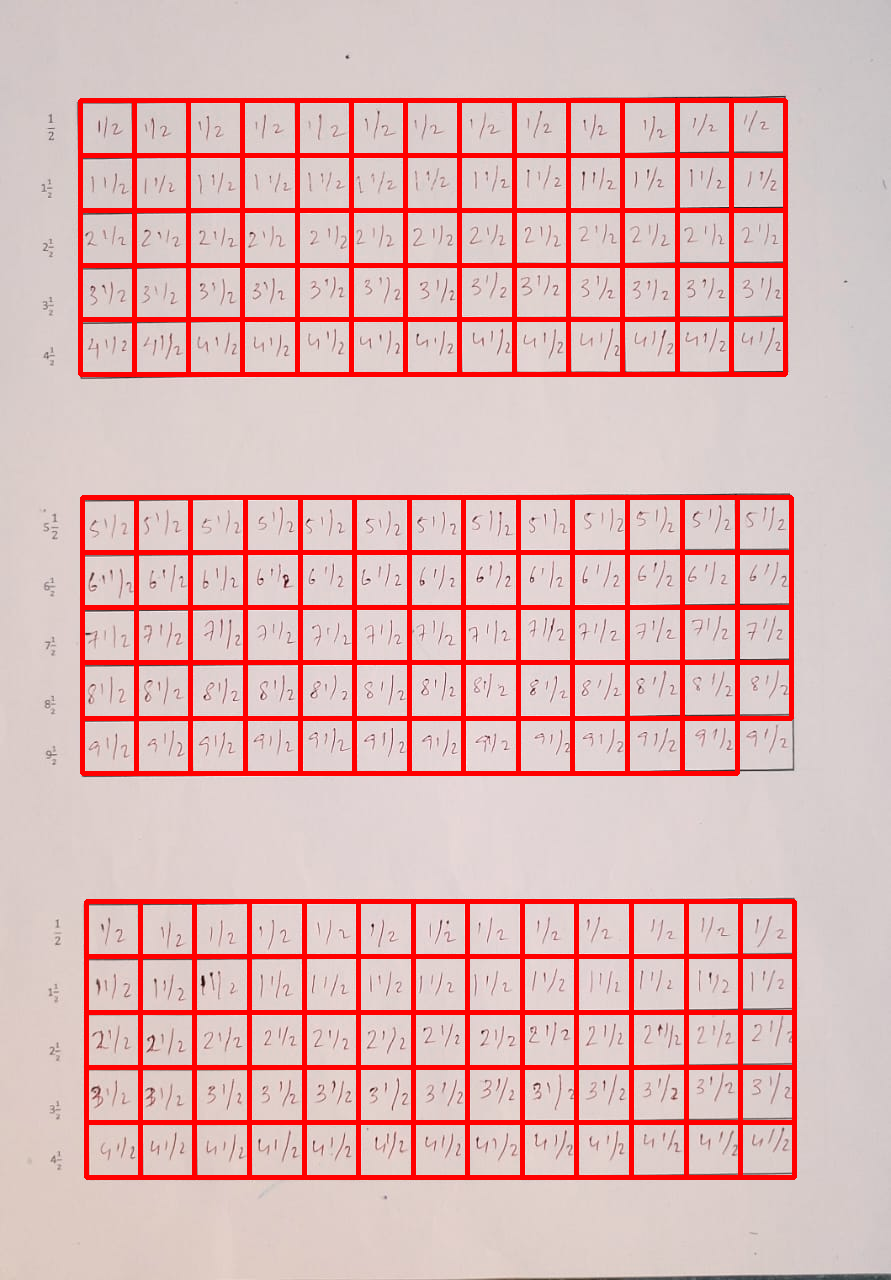

In [4]:
table_img = cv2.imread("Image8.jpg")
i = 195
cp_table = table_img.copy()

for table in extracted_tables:
    for row in table.content.values():
        for cell in row:
            cv2.rectangle(cp_table, (cell.bbox.x1, cell.bbox.y1), (cell.bbox.x2, cell.bbox.y2),(255, 0, 0), 3)
            sp_cell = table_img[cell.bbox.y1:cell.bbox.y2, cell.bbox.x1:cell.bbox.x2]
            #cv2.imwrite(f'./Cell_cropped/Cell_{i}.jpg', sp_cell)
            i = i + 1
            
PILImage.fromarray(cp_table)